In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('hr_tratado.csv',index_col=0)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df_no = df[df['attrition'] == 'No']

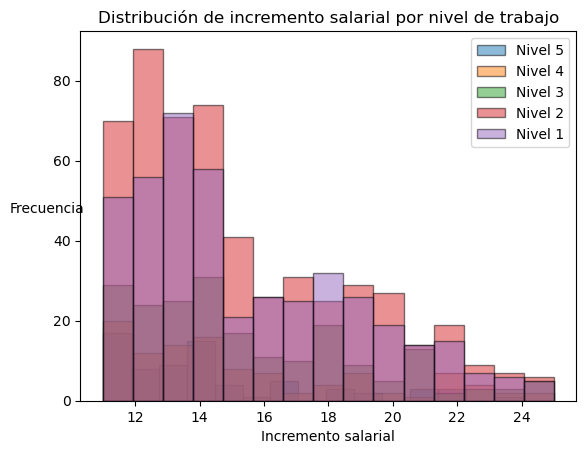

In [4]:
#INCREMENTO SALARIO---NIVEL TRABAJO
for level in df_no['joblevel'].unique():
    subset = df_no[df_no['joblevel'] == level]['incremento_salario']
    plt.hist(subset, bins=15, alpha=0.5, label=f'Nivel {level}', edgecolor='black')

plt.title('Distribución de incremento salarial por nivel de trabajo')
plt.xlabel('Incremento salarial')
plt.ylabel('Frecuencia', rotation=0)
plt.legend()
plt.show()

de las perfiles que se han ido,, los que mas subida de salario han tenido son los 1 y 2 los mas junior

C:\Users\ganto\AppData\Local\Temp\ipykernel_4184\1367830413.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='horas_extra', data=df_no, palette="Blues")


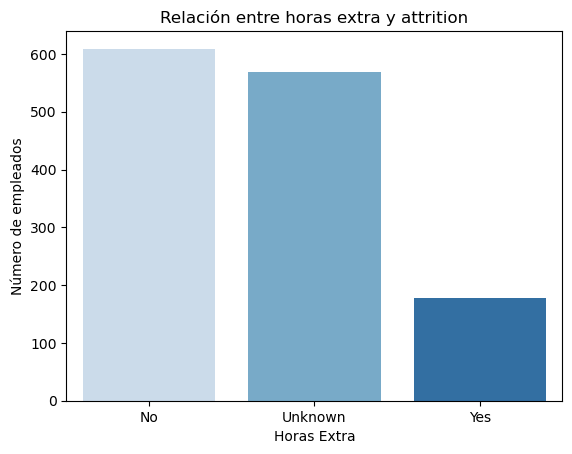

In [5]:
sns.countplot(x='horas_extra', data=df_no, palette="Blues")
plt.title("Relación entre horas extra y attrition")
plt.xlabel("Horas Extra")
plt.ylabel("Número de empleados")
plt.show()

se van mas los que no hacen horas extra

Text(0, 0.5, 'Número de empleados')

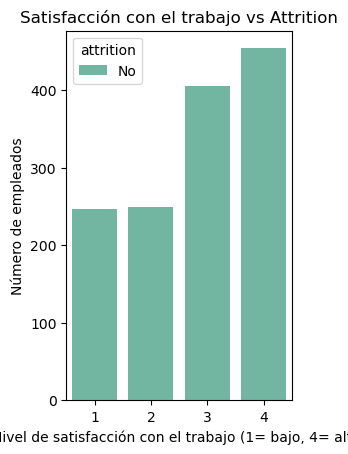

In [6]:
#¿La satisfacción con el trabajo o con el ambiente influye en la salida
plt.subplot(1,2,1)
sns.countplot(x="jobsatisfaction", hue="attrition", data=df_no, palette="Set2")
plt.title("Satisfacción con el trabajo vs Attrition")
plt.xlabel("Nivel de satisfacción con el trabajo (1= bajo, 4= alto)")
plt.ylabel("Número de empleados")

los que se van, estaban mas contentos con su trabajo

C:\Users\ganto\AppData\Local\Temp\ipykernel_4184\1810017447.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="age", y="yearssincelastpromotion", data=df_no, palette="Blues", estimator="mean")


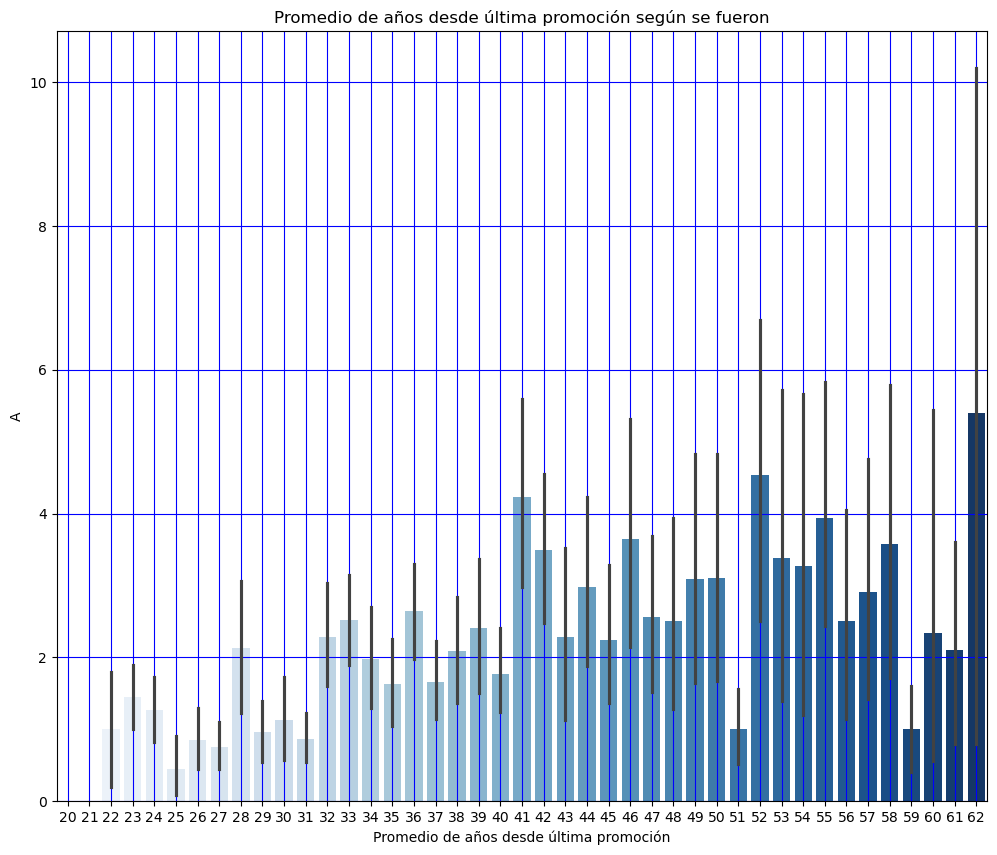

In [7]:
#¿Influye el tiempo desde la última promoción en la decisión de irse
plt.figure(figsize=(12,10))
sns.barplot(x="age", y="yearssincelastpromotion", data=df_no, palette="Blues", estimator="mean")
plt.grid(c='b')
plt.title("Promedio de años desde última promoción según se fueron")
plt.xlabel("Promedio de años desde última promoción")
plt.ylabel("A")
plt.show()

de entre 20 y 3o tienen una media de promocion de 2 años, mientras que entre 30 y 40 sube entre 4 y 5 años 
a mas edad mayor tiempo en promocionar
la gente que mas se va esta entre 30 y 40 años

C:\Users\ganto\AppData\Local\Temp\ipykernel_4184\2984268048.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="attrition", y="yearssincelastpromotion", data=df_no, palette="coolwarm")


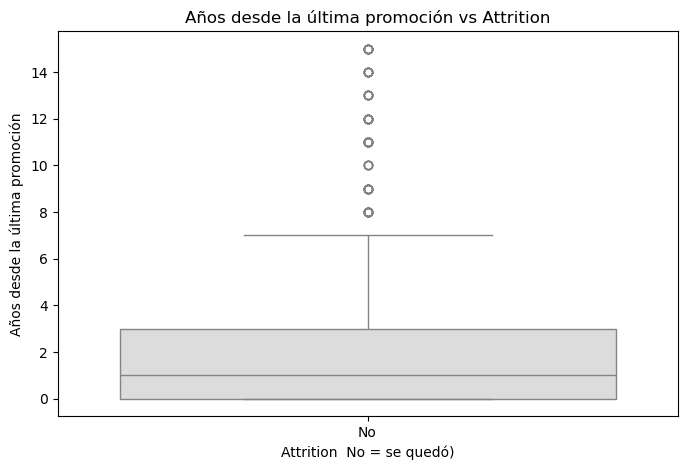

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x="attrition", y="yearssincelastpromotion", data=df_no, palette="coolwarm")
plt.title("Años desde la última promoción vs Attrition")
plt.xlabel("Attrition  No = se quedó)")
plt.ylabel("Años desde la última promoción")
plt.show()

In [9]:
#¿El campo de educación marca diferencias?MARIA
edu_attrition = (
    df.groupby(["educationfield", "attrition"])
    .size()
    .reset_index(name="count")
)

In [10]:
edu_attrition["percent"] = edu_attrition.groupby("educationfield")["count"].transform(lambda x: 100 * x / x.sum())

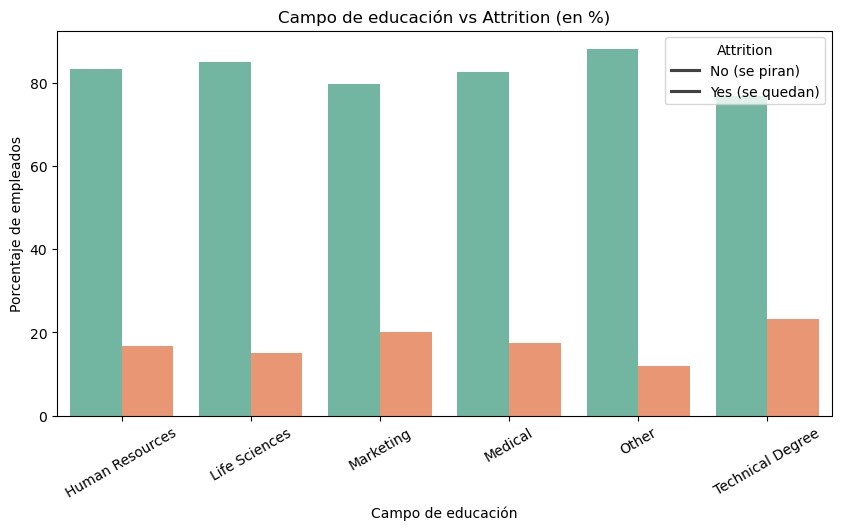

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(
    x="educationfield", 
    y="percent", 
    hue="attrition", 
    data=edu_attrition, 
    palette="Set2"
)
plt.title("Campo de educación vs Attrition (en %)")
plt.xlabel("Campo de educación")
plt.ylabel("Porcentaje de empleados")
plt.xticks(rotation=30)
plt.legend(title="Attrition", labels=["No (se piran)", "Yes (se quedan)"])
plt.show()

C:\Users\ganto\AppData\Local\Temp\ipykernel_4184\2392985920.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_no_attrition['percent'] = edu_no_attrition.groupby('educationfield')['count'].transform(lambda x: 100 * x / x.sum())
C:\Users\ganto\AppData\Local\Temp\ipykernel_4184\2392985920.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=edu_no_attrition, x='educationfield', y='percent', palette='viridis')


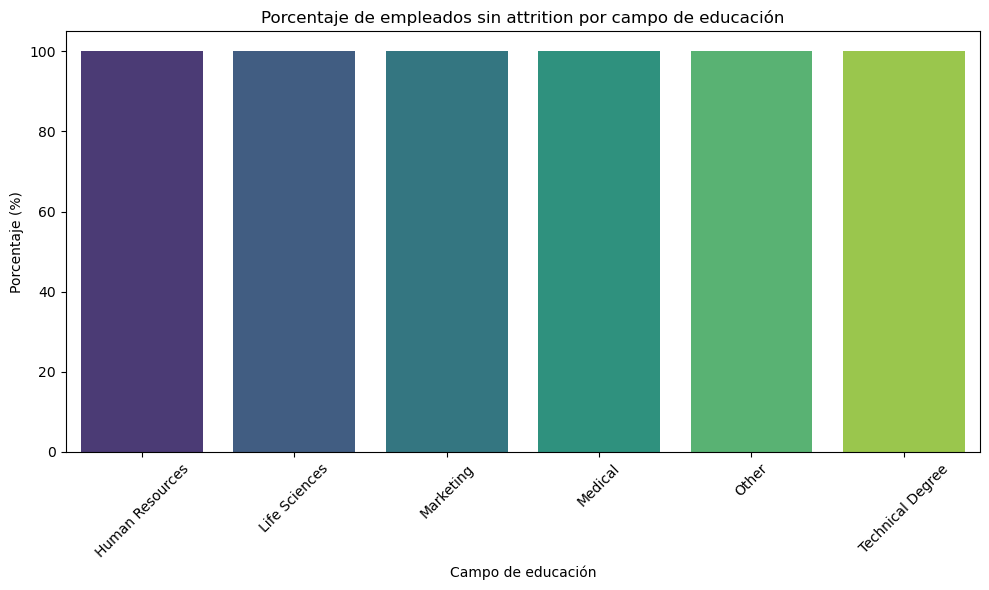

In [12]:
edu_no_attrition = edu_attrition[edu_attrition['attrition'] == 'No']

# Calcular porcentaje por campo de educación
edu_no_attrition['percent'] = edu_no_attrition.groupby('educationfield')['count'].transform(lambda x: 100 * x / x.sum())

# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(data=edu_no_attrition, x='educationfield', y='percent', palette='viridis')
plt.xticks(rotation=45)
plt.title('Porcentaje de empleados sin attrition por campo de educación')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Campo de educación')
plt.tight_layout()
plt.show()

C:\Users\ganto\AppData\Local\Temp\ipykernel_4184\4150518863.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= df_no, x='age', y='salary_month', palette='pastel')


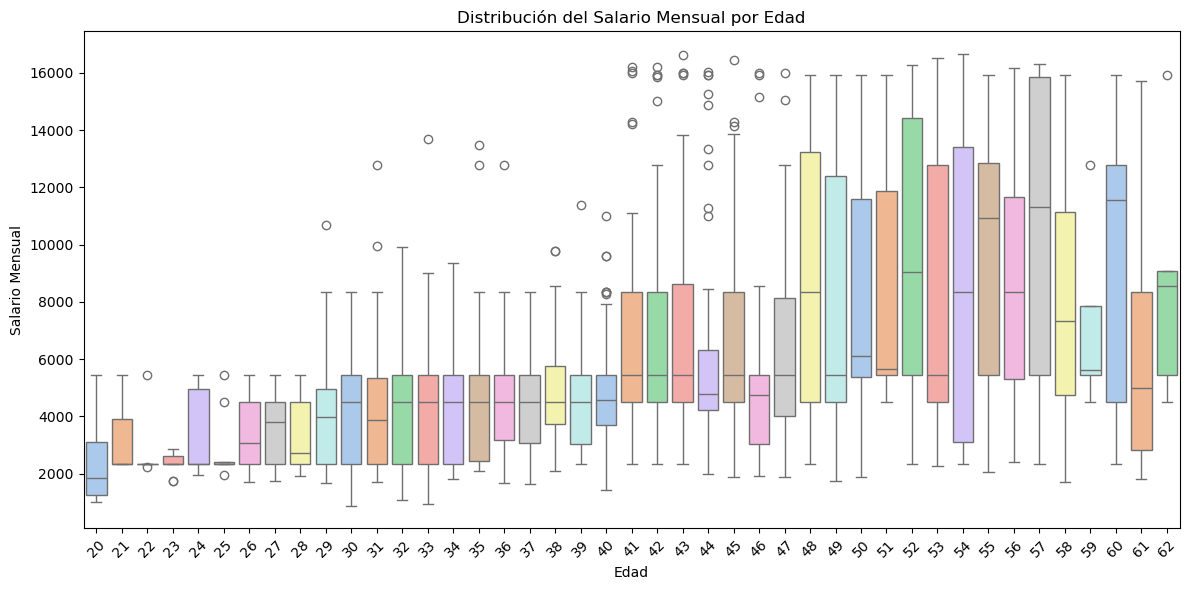

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(data= df_no, x='age', y='salary_month', palette='pastel')
plt.title('Distribución del Salario Mensual por Edad')
plt.xlabel('Edad')
plt.ylabel('Salario Mensual')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\ganto\AppData\Local\Temp\ipykernel_4184\4228788678.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= df_no, x='salary_month', y='age', palette='pastel')


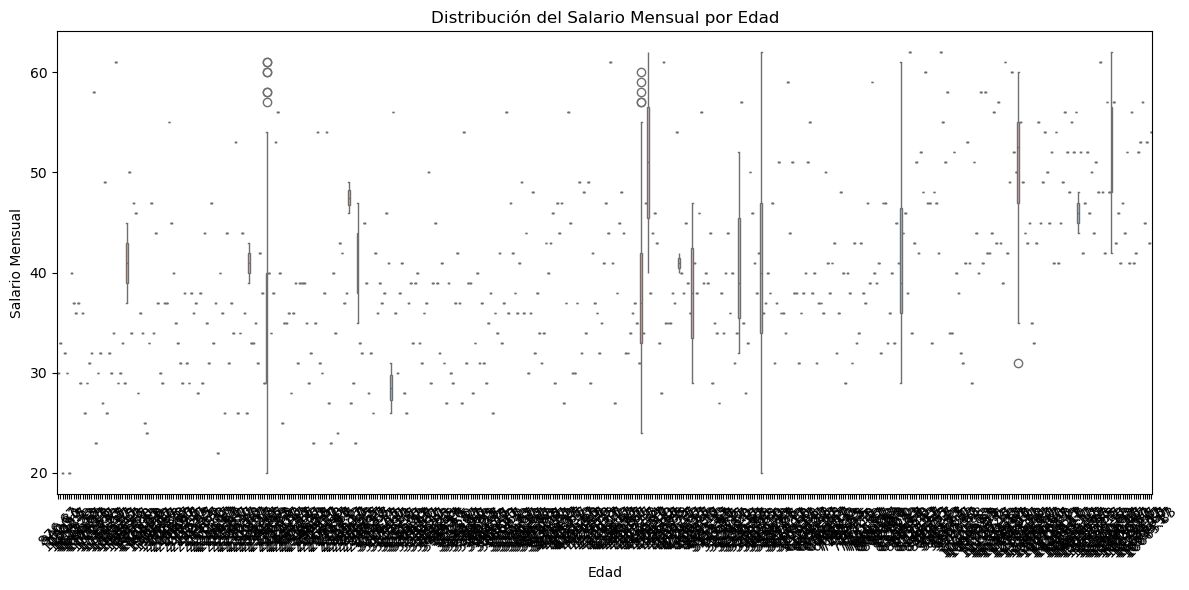

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(data= df_no, x='salary_month', y='age', palette='pastel')
plt.title('Distribución del Salario Mensual por Edad')
plt.xlabel('Edad')
plt.ylabel('Salario Mensual')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()